# **Simple Linear Regression(SLR) Assignment**

# ***Assignment 4(a)***

# ***1.delivery_time dataset(delivery_time.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
df=pd.read_csv('delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# **Exploratory Data Analysis**

In [4]:
df.shape

(21, 2)

In [5]:
#checking missing values
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
df.isna().any()

Delivery Time    False
Sorting Time     False
dtype: bool

In [7]:
#checking duplicates
df.duplicated().sum()

0

In [8]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [9]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# **Correlation**

In [11]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:
#Delivery time is dependent feature
#Sorting time is independent feature

# **Visualization**

# **Heatmap**

<Axes: >

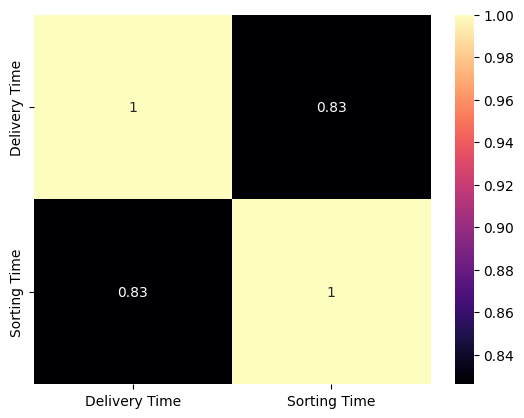

In [13]:
#heatmap
sns.heatmap(df.corr(),annot=True,cmap='magma')

# **Pairplot**

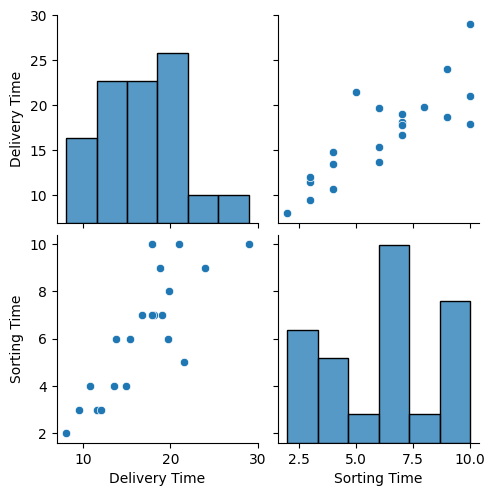

In [14]:
#pairplot
sns.pairplot(df,palette='coolwarm')

# **Distplot**

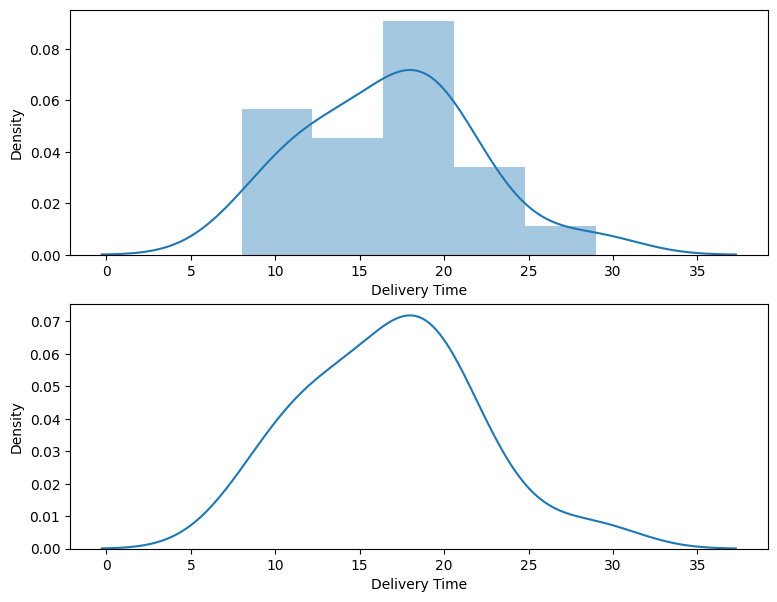

In [15]:
#distplot
plt.figure(figsize=(9,7))
plt.subplot(211)
sns.distplot(df['Delivery Time'])
plt.subplot(212)
sns.kdeplot(df['Delivery Time'])
plt.show()

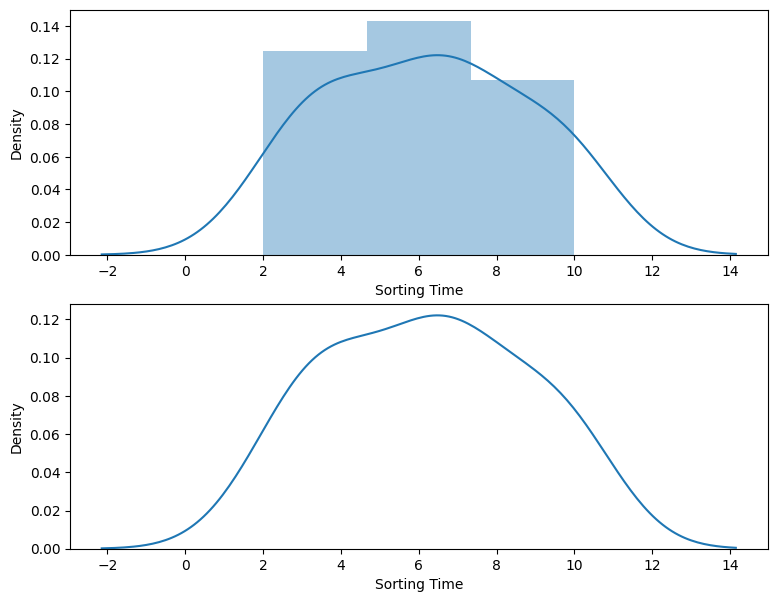

In [16]:
plt.figure(figsize=(9,7))
plt.subplot(211)
sns.distplot(df['Sorting Time'])
plt.subplot(212)
sns.kdeplot(df['Sorting Time'])
plt.show()


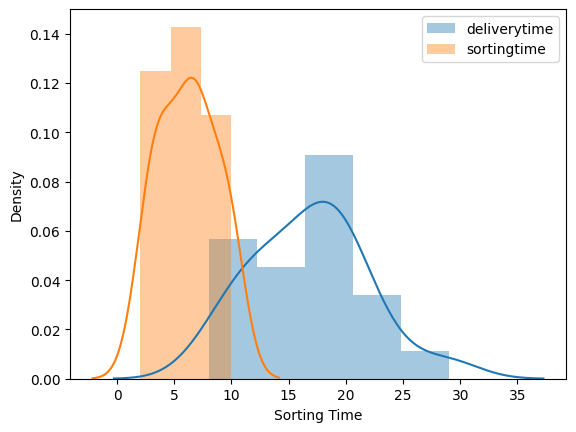

In [17]:
#distplot for two features
sns.distplot(df['Delivery Time'],label='deliverytime')
sns.distplot(df['Sorting Time'],label='sortingtime')
plt.legend()
plt.show()

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

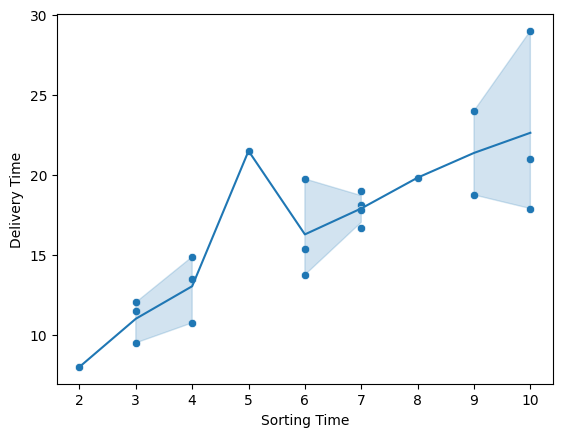

In [18]:
#scatterplot
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=df)
sns.lineplot(x='Sorting Time',y='Delivery Time',data=df)

# **Boxplot**

<Axes: >

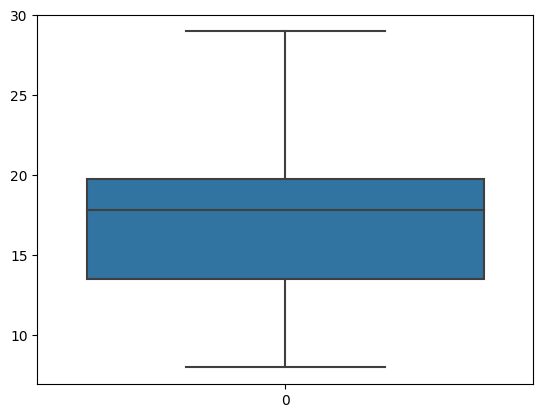

In [19]:
#boxplot
sns.boxplot(df['Delivery Time'])

<Axes: >

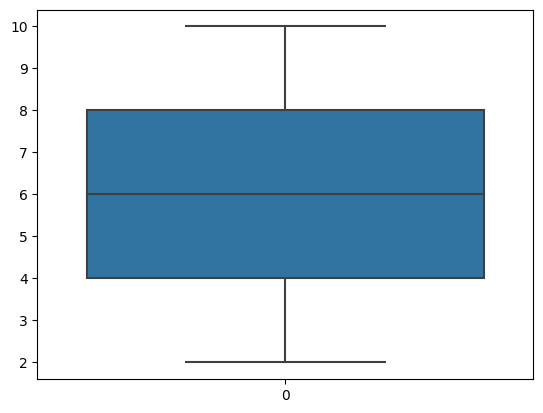

In [20]:
sns.boxplot(df['Sorting Time'])

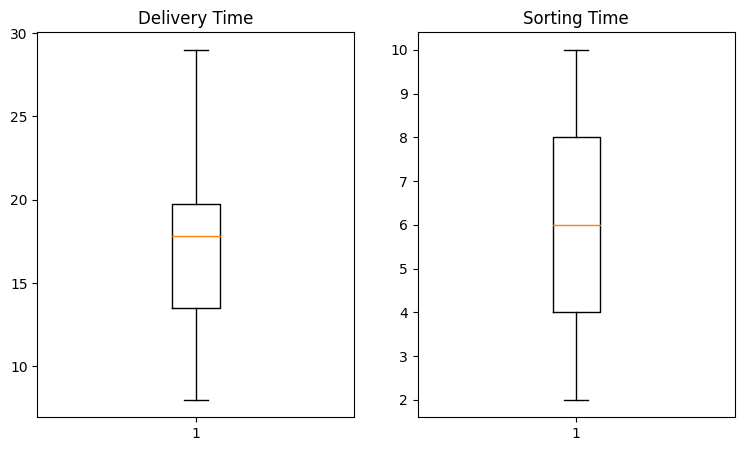

In [21]:
#box plot for two features
plt.subplots(figsize=(9,5))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

# **Histogram**

<Axes: xlabel='Delivery Time', ylabel='Count'>

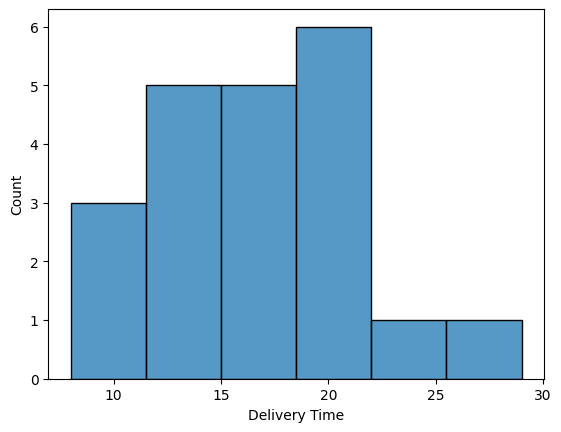

In [22]:
#histogram
sns.histplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Count'>

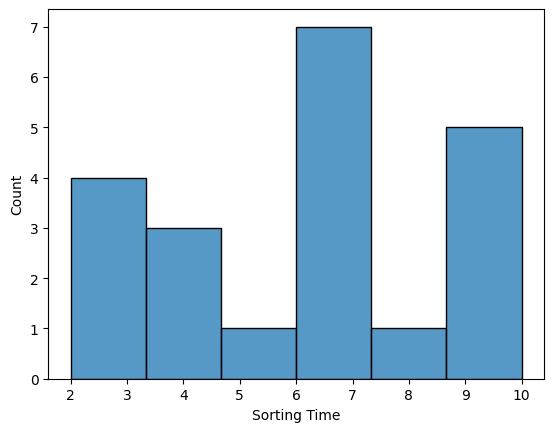

In [23]:
sns.histplot(df['Sorting Time'])

In [24]:
#renaming
df=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [25]:
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# **Correlation Analysis**


In [26]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

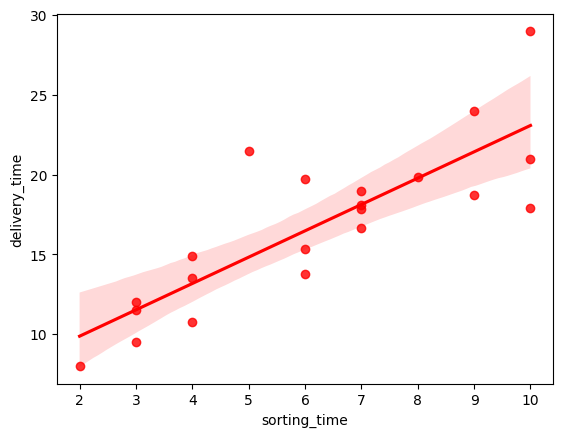

In [27]:
#regression plot
sns.regplot(x='sorting_time',y='delivery_time',data=df,color='red')

# **Building Model**

# **Model 1**

In [28]:
#model1

In [29]:
model=smf.ols('delivery_time~sorting_time',data=df).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        19:13:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [32]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [33]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [34]:
model.rsquared

0.6822714748417231

In [35]:
model.rsquared_adj

0.6655489208860244

In [36]:
pred=model.predict(df['sorting_time'])  #predicted value

In [37]:
model.resid   #error

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [38]:
df['delivery_time']

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: delivery_time, dtype: float64

In [39]:
rmse=np.sqrt(np.mean((np.array(df['delivery_time'])-np.array(pred))**2))

In [40]:
rmse

2.7916503270617654

In [41]:
model.rsquared

0.6822714748417231

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

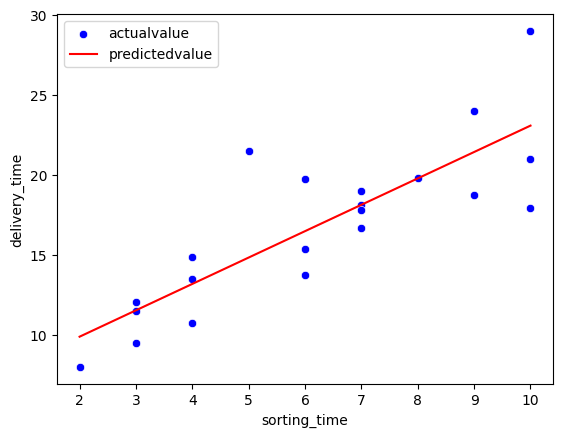

In [42]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=df,label='actualvalue',color='blue')
sns.lineplot(x='sorting_time',y=pred,data=df,label='predictedvalue',color='red')

In [43]:
#Accuracy is 0.6822714748417231 i.e 68%

# **Model 2**

In [44]:
#model2

In [45]:
#for exponential

In [46]:
df['sorting_timesq']=df['sorting_time']*df['sorting_time']

In [47]:
df.head()

,delivery_time,sorting_time,sorting_timesq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [48]:
model2=smf.ols('np.log(delivery_time)~sorting_time+sorting_timesq',data=df).fit()

In [49]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Sat, 13 Jan 2024   Prob (F-statistic):           2.20e-06
Time:                           19:13:44   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time       0.2659      0.080      3.315      0.004       0.097       0.434
sorting_timesq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
pred2=model2.predict(df[['sorting_time','sorting_timesq']])

In [51]:
pred2=np.exp(pred2)

In [52]:
pred2

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [53]:
rmse2=np.sqrt(np.mean((np.array(df['delivery_time'])-np.array(pred2))**2))

In [54]:
rmse2

2.799041988740932

In [55]:
model2.rsquared

0.7648666342953729

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

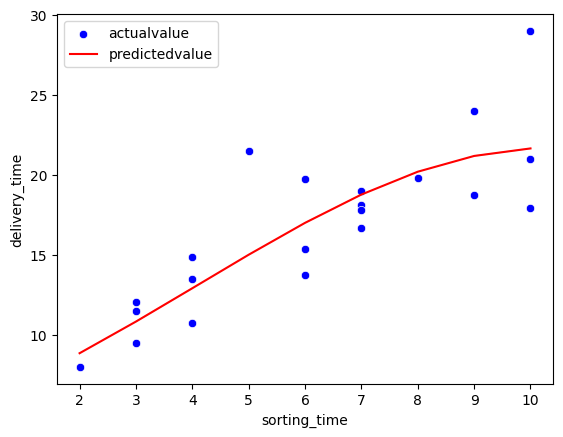

In [56]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=df,label='actualvalue',color='blue')
sns.lineplot(x='sorting_time',y=pred2,data=df,label='predictedvalue',color='red')

In [57]:
#Accuracy is 0.7648666342953729 i.e 76%

# **Conclusion**

In [58]:
#So here model2 i.e exponential model giving us more accuracy i.e 76%

**So here model2 i.e exponential model giving us more accuracy i.e 76%**

# **Performing Prediction**

In [59]:
#manual prediction
#FOR SORTING TIME 7

In [60]:
#mp=B1+B0*5
mp=	6.5827+1.6490	*7

In [61]:
mp

18.1257

In [62]:
#Automatic prediction
#for soting time 7,9,11

In [63]:
new=pd.Series([7,9,11])

In [64]:
new

0     7
1     9
2    11
dtype: int64

In [65]:
new_pred=pd.DataFrame(new,columns=['sorting_time'])

In [66]:
new_pred

,sorting_time
0,7
1,9
2,11


In [67]:
model.predict(new_pred)

0    18.125873
1    21.423913
2    24.721953
dtype: float64

In [68]:
#completed

# **completed**